In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv("synthetic_dataset.csv")

## Estimación de Parámetros con OLS

In [114]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,4.967142,-1.382643,NaN,15.230299,-2.341534,-2.341370,15.792128,7.674347,-4.694744,5.425600,-4.634177,-4.657298,2.419623,-19.132802,-17.249178,152.273643
1,-5.622875,-10.128311,3.142473,-9.080241,-14.123037,14.656488,-2.257763,NaN,-14.247482,-5.443827,1.109226,-11.509936,3.756980,-6.006387,-2.916937,144.947630
2,-6.017066,18.522782,-0.134972,-10.577109,8.225449,NaN,2.088636,-19.596701,-13.281860,1.968612,7.384666,1.713683,-1.156483,-3.011037,-14.785220,188.449076
3,-7.198442,-4.606388,NaN,3.436183,-17.630402,3.240840,-3.850823,-6.769220,6.116763,10.309995,9.312801,NaN,-3.092124,3.312634,9.755451,107.875692
4,-4.791742,-1.856590,-11.063350,-11.962066,8.125258,13.562400,-0.720101,10.035329,3.616360,-6.451198,3.613956,15.380366,-0.358260,15.646437,-26.197451,-78.724744


Cuantificar los valores faltantes de cada variable

In [115]:
print(df.isnull().sum())

X1     205
X2     202
X3     210
X4     222
X5     210
X6     195
X7     185
X8     193
X9     195
X10    195
X11    189
X12    198
X13    211
X14    198
X15    192
Y        0
dtype: int64


Calcular el porcentaje que representan los datos faltantes 

In [116]:
total_datos = 4000 
print(f"Total de datos: {total_datos}")

X1 = (205 / total_datos) * 100
X2 = (202 / total_datos) * 100
X3 = (210 / total_datos) * 100
X4 = (222 / total_datos) * 100
X5 = (210 / total_datos) * 100

print(f"El porcentaje que representan de datos nulos en cada una de las categorías son los siguientes:\n"
      f"X1: {X1:.2f}%\n"
      f"X2: {X2:.2f}%\n"
      f"X3: {X3:.2f}%\n"
      f"X4: {X4:.2f}%\n"
      f"X5: {X5:.2f}%\n"
)

Total de datos: 4000
El porcentaje que representan de datos nulos en cada una de las categorías son los siguientes:
X1: 5.12%
X2: 5.05%
X3: 5.25%
X4: 5.55%
X5: 5.25%



El porcentaje de valores faltantes en los datos es del 5%, lo que se considera significativo para este estudio. Generalmente, cuando la cantidad de datos ausentes supera este umbral, su eliminación podría afectar la validez del análisis al introducir sesgos o reducir la representatividad de la muestra. Por esta razón, en lugar de eliminarlos, es recomendable aplicar estrategias de imputación adecuadas para preservar la integridad de los resultados.

Sin embargo, antes de realizar la imputación, es fundamental verificar si las variables siguen una distribución normal. Esto permitirá determinar el método de imputación más adecuado: si la distribución es normal, se puede imputar con la media, mientras que, si la distribución es asimétrica, es preferible utilizar la mediana para evitar distorsiones en los datos.

## Normalización

In [117]:
numerical_cols = np.array(["X1", "X2", "X3", "X4", "X5"])
for col in numerical_cols:  
    if col in df.columns:  
        stat, p_value = stats.normaltest(df[col].dropna())  
        print(f" {col}: Estadístico = {stat}, p-valor = {p_value}")

        if p_value < 0.05:
            print(" Los datos NO siguen una distribución normal.\n")
        else:
            print(" Los datos siguen una distribución normal.\n")
    else:
        print(f" La columna '{col}' no existe en el DataFrame.\n")

 X1: Estadístico = 3.165120884485229, p-valor = 0.20544838545904986
 Los datos siguen una distribución normal.

 X2: Estadístico = 1.107147111082594, p-valor = 0.5748917277151018
 Los datos siguen una distribución normal.

 X3: Estadístico = 0.8312062793277601, p-valor = 0.6599421233743414
 Los datos siguen una distribución normal.

 X4: Estadístico = 1.0703099682544395, p-valor = 0.5855785277345695
 Los datos siguen una distribución normal.

 X5: Estadístico = 3.4799554217609905, p-valor = 0.17552431285578177
 Los datos siguen una distribución normal.



En este caso, aplicaremos la imputación con la media, ya que es una estrategia eficaz cuando los datos siguen una distribución aproximadamente normal y no presentan valores atípicos significativos. Este método permite mantener la tendencia central de los datos sin sesgar los resultados.

In [118]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
Y      0
dtype: int64


# Correlación entre variables

Verificamos la correlación entre las variables para determinar si es posible calcular la inversa de la matriz. Para que esto sea viable, el determinante debe ser distinto de cero, lo que implica que las columnas de la matriz no pueden ser linealmente dependientes o idénticas. Si existe una alta correlación entre variables, es posible que la matriz sea singular, impidiendo su inversión.

Text(0.5, 1.0, 'Matriz de Correlación')

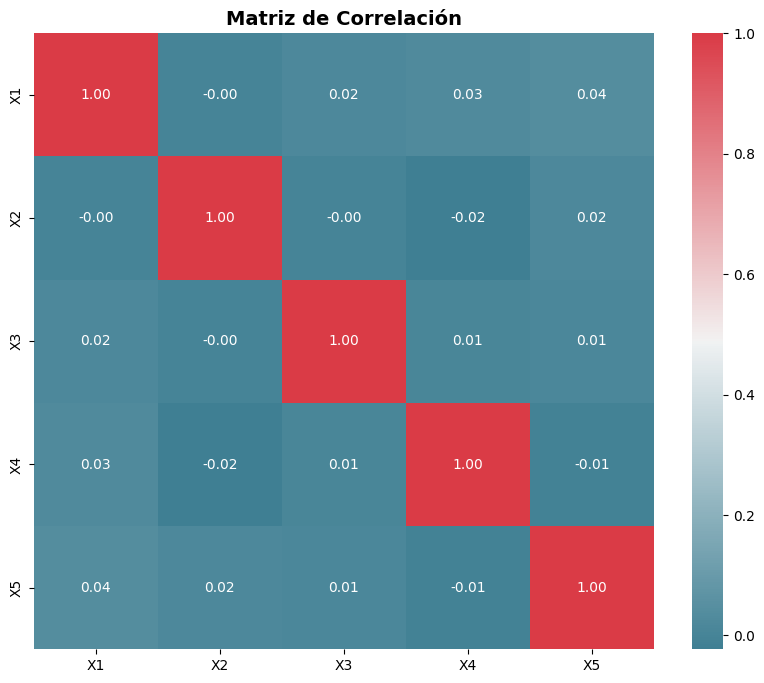

In [119]:
columnas = ['X1', 'X2', 'X3',  'X4','X5' ]

corr_mat = df[columnas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=14, fontweight="bold")

A partir del gráfico anterior, se puede afirmar que las variables no presentan una correlación significativa. Por lo tanto, la matriz no es singular, lo que permite calcular su inversa sin inconvenientes.

## Numpy: Cálculo de los coeficientes usando la fórmula OLS: β = (XᵀX)⁻¹ Xᵀy

Agregar columna de unos para el término independiente (β0)

In [120]:
import numpy as np

X = df[["X1", "X2", "X3", "X4", "X5"]].values
y = df["Y"].values


X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añade una columna de unos a X
print(X_b)


[[  1.           4.96714153  -1.38264301   0.17416585  15.23029856
   -2.34153375]
 [  1.          -5.62287529 -10.1283112    3.14247333  -9.08024076
  -14.12303701]
 [  1.          -6.01706612  18.52278185  -0.13497225 -10.57710929
    8.22544912]
 ...
 [  1.           7.87651287   2.53753554   3.77975684   0.2359561
   -1.33503315]
 [  1.          19.51254434   3.24704153  19.37021313  -1.25082575
    5.89664406]
 [  1.           7.64050782  -4.95093801  -2.73401072  -2.59206311
    2.74768867]]


Multiplicación de la transpuesta de X por X

In [121]:

XT_X = X_b.T @ X_b  
print(XT_X)

[[ 4.00000000e+03 -5.98878053e+02 -5.56921563e+02  6.96663386e+02
   1.99398603e+02  2.12449246e+02]
 [-5.98878053e+02  3.96423585e+05 -2.71507934e+02  6.49439923e+03
   1.08638741e+04  1.48834052e+04]
 [-5.56921563e+02 -2.71507934e+02  3.79807773e+05 -1.71674571e+02
  -8.70140047e+03  6.77466785e+03]
 [ 6.96663386e+02  6.49439923e+03 -1.71674571e+02  3.77447396e+05
   3.21250277e+03  4.89694301e+03]
 [ 1.99398603e+02  1.08638741e+04 -8.70140047e+03  3.21250277e+03
   3.75720356e+05 -3.55752193e+03]
 [ 2.12449246e+02  1.48834052e+04  6.77466785e+03  4.89694301e+03
  -3.55752193e+03  3.61252658e+05]]


Inversa de (XᵀX)

In [122]:
XT_X_inv = np.linalg.inv(XT_X)  
print(XT_X_inv)

[[ 2.50206769e-04  3.95720922e-07  3.66851709e-07 -4.65174637e-07
  -1.33321564e-07 -1.65334627e-07]
 [ 3.95720922e-07  2.52980176e-06  2.54273417e-09 -4.22701788e-08
  -7.39293784e-08 -1.04661852e-07]
 [ 3.66851709e-07  2.54273417e-09  2.63570930e-06  6.02537055e-10
   6.03021741e-08 -4.91629911e-08]
 [-4.65174637e-07 -4.22701788e-08  6.02537055e-10  2.65158814e-06
  -2.15120448e-08 -3.41515476e-08]
 [-1.33321564e-07 -7.39293784e-08  6.03021741e-08 -2.15120448e-08
   2.66561303e-06  2.85352581e-08]
 [-1.65334627e-07 -1.04661852e-07 -4.91629911e-08 -3.41515476e-08
   2.85352581e-08  2.77422088e-06]]


Multiplicación de la transpuesta de X por y

In [123]:
XT_y = X_b.T @ y  
print(XT_y)

[   -1952.94796079 -1198110.37318335  1709672.3711654   1801453.88435047
   160186.07986866 -1179743.59322193]


Cálculo final de los coeficientes

In [124]:
beta = XT_X_inv @ XT_y  

print(f"Coeficientes estimados (β):\n")
print(f"β0 (Intercepto): {beta[0]:.4f}")
print(f"β1 (X1): {beta[1]:.4f}")
print(f"β2 (X2): {beta[2]:.4f}")
print(f"β3 (X3): {beta[3]:.4f}")
print(f"β4 (X4): {beta[4]:.4f}")
print(f"β5 (X5): {beta[5]:.4f}")

Coeficientes estimados (β):

β0 (Intercepto): -0.9999
β1 (X1): -2.9919
β2 (X2): 4.5712
β3 (X3): 4.8661
β4 (X4): 0.5465
β5 (X5): -3.2882


Comprobar modelo obtenido por medio de la libreria (statsmodel)

In [125]:
import statsmodels.api as sm
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df con variables "X" y "y"
X = df[["X1", "X2", "X3", "X4", "X5"]].values  # Variable independiente (predictor)
y = df['Y'].values  # Variable dependiente (objetivo)

# Agregar una constante para el término de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     535.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:53:43   Log-Likelihood:                -23886.
No. Observations:                4000   AIC:                         4.778e+04
Df Residuals:                    3994   BIC:                         4.782e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9999      1.502     -0.666      0.5

##  Estimación de Parámetros con Gradient Descent 

1. Definir las variables y preparar los datos

In [126]:
X = df[["X1", "X2", "X3", "X4", "X5"]].values  # Variables independientes
y = df['Y'].values  # Variable dependiente


2. Agregar la columna de unos para el bias (intercepto)

In [142]:
X = np.c_[np.ones(X.shape[0]), X]  # Agregar columna de 1s
print(X)


[[  1.           1.           4.96714153 ...   0.17416585  15.23029856
   -2.34153375]
 [  1.           1.          -5.62287529 ...   3.14247333  -9.08024076
  -14.12303701]
 [  1.           1.          -6.01706612 ...  -0.13497225 -10.57710929
    8.22544912]
 ...
 [  1.           1.           7.87651287 ...   3.77975684   0.2359561
   -1.33503315]
 [  1.           1.          19.51254434 ...  19.37021313  -1.25082575
    5.89664406]
 [  1.           1.           7.64050782 ...  -2.73401072  -2.59206311
    2.74768867]]


3. Inicializar los coeficientes (θ)

In [141]:
theta = np.zeros(X.shape[1])  
print(f"Parámetros iniciales: {theta}")


Parámetros iniciales: [0. 0. 0. 0. 0. 0.]


4. Definir los hiperparámetros

 Configurar una tasa de aprendizaje (alpha) y número de iteraciones adecuado.

Se probarán diferentes valores de la tasa de aprendizaje hasta encontrar aquel que permita una convergencia rápida y estable. El objetivo es ajustar 
𝛼
α de manera que la curva de la función de costo descienda de forma acelerada, pero sin oscilaciones ni comportamientos erráticos. Si la curva baja muy lentamente, se incrementará 
𝛼
α; en cambio, si presenta fluctuaciones o aumenta, se reducirá hasta lograr un descenso óptimo.

In [130]:
alpha = 0.01  # Tasa de aprendizaje
epochs = 1000  # Número de iteraciones


5. Aplicar el Algoritmo de Gradient Descent



In [131]:
m = len(y)  # Número de observaciones

for i in range(epochs):
    y_pred = X.dot(theta)  # Predicción del modelo
    error = y_pred - y  # Diferencia entre predicción y valores reales
    gradient = (1/m) * X.T.dot(error)  # Cálculo del gradiente
    theta -= alpha * gradient  # Actualización de coeficientes


6. Mostrar los coeficientes finales

In [132]:
print(f"Parámetros estimados: {theta}")


Parámetros estimados: [-0.9998126  -2.99192333  4.57118124  4.86614076  0.54650972 -3.28815409]


### Evaluar la convergencia de los coeficientes.

Si los coeficientes (𝜃) dejan de cambiar significativamente entre iteraciones, significa que el algoritmo ha convergido. Puedes medir esto observando la diferencia absoluta entre iteraciones sucesivas:


In [133]:
import numpy as np

# Definir un umbral de convergencia (por ejemplo, 1e-6)
tolerance = 1e-6  

# Almacenar valores previos de theta
theta_old = np.zeros(theta.shape)  

for i in range(epochs):
    y_pred = X.dot(theta)
    error = y_pred - y
    gradient = (1/m) * X.T.dot(error)
    theta -= alpha * gradient  # Actualización de coeficientes

    # Comprobar si los coeficientes han convergido
    if np.linalg.norm(theta - theta_old, ord=2) < tolerance:
        print(f"Convergencia alcanzada en la iteración {i}")
        break
    
    theta_old = theta.copy()  # Actualizar theta_old para la siguiente iteración


Convergencia alcanzada en la iteración 1


La función de costo (MSE) debe disminuir con cada iteración hasta estabilizarse. Si deja de cambiar significativamente, el modelo ha convergido.

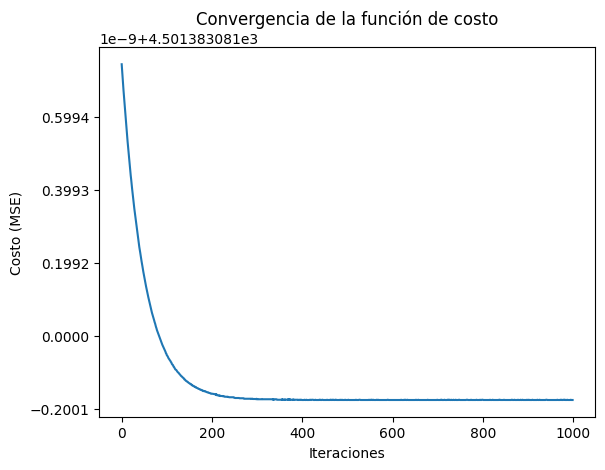

In [134]:
import matplotlib.pyplot as plt

cost_history = []

for i in range(epochs):
    y_pred = X.dot(theta)
    error = y_pred - y
    cost = (1/(2*m)) * np.sum(error**2)  # MSE
    cost_history.append(cost)
    gradient = (1/m) * X.T.dot(error)
    theta -= alpha * gradient

# Graficar la función de costo
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteraciones")
plt.ylabel("Costo (MSE)")
plt.title("Convergencia de la función de costo")
plt.show()


El gráfico de convergencia muestra una tendencia descendente, lo que indica que la función de costo disminuye con cada iteración. Esto confirma que el algoritmo de Gradient Descent está optimizando los coeficientes de manera efectiva y acercándose a una solución óptima.

Dado que la curva se estabiliza después de varias iteraciones, se puede concluir que el modelo ha convergido adecuadamente, logrando minimizar el error en las predicciones. Esto valida el uso de la tasa de aprendizaje seleccionada y el número de iteraciones establecidas. En caso de requerir una convergencia más rápida, podrían explorarse ajustes en estos hiperparámetros.

In [135]:
import statsmodels.api as sm

modelo_ols = sm.OLS(y, X).fit()
print("Coeficientes OLS:", modelo_ols.params)
print("Coeficientes Gradient Descent:", theta)


Coeficientes OLS: [-0.99985636 -2.9919234   4.57118118  4.86614084  0.54650974 -3.28815406]
Coeficientes Gradient Descent: [-0.99985636 -2.9919234   4.57118118  4.86614084  0.54650974 -3.28815406]


Ambos son similares, significa que el descenso de gradiente ha convergido correctamente.

Utilizando tanto el método de *Mínimos Cuadrados Ordinarios (OLS)* como el *Descenso de Gradiente (Gradient Descent)*, es posible obtener los mismos coeficientes para el modelo de regresión. Mientras que OLS encuentra la solución de manera directa resolviendo ecuaciones matriciales, Gradient Descent optimiza los coeficientes iterativamente minimizando el error. Ambos enfoques, aunque diferentes en su procedimiento, pueden conducir a los mismos valores óptimos para los parámetros del modelo.